In [1]:
import math
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from random import randint

#### Посмотрим на датасет

In [2]:
# Получим список файлов в директориях 
np_files_0_train = glob.glob("dataset/train/0/*.npy")
np_files_0_val = glob.glob("dataset/val/0/*.npy")
np_files_1_train = glob.glob("dataset/train/1/*.npy")
np_files_1_val = glob.glob("dataset/val/1/*.npy")

# Сортировка 
np_files_0_train.sort()
np_files_0_val.sort()
np_files_1_train.sort()
np_files_1_val.sort()

# Инициализация пустых DataFram'ов
df_0_train = pd.DataFrame()
df_0_val = pd.DataFrame()
df_1_train = pd.DataFrame()
df_1_val = pd.DataFrame()

# Для вспомогательных нужд
len_0_train = []
len_0_val = []
len_1_train = []
len_1_val = []

# Запись в DataFrame и оценка размерности (длины ряда)
for i, npfile in enumerate(np_files_0_train):
    load_data = np.load(npfile)
    len_0_train.append(len(load_data))
    df_0_train[i] = pd.Series(load_data[0:3653])
print("Length of time series in train 0 class: Max=", max(len_0_train), "Min=", min(len_0_train))


for i, npfile in enumerate(np_files_0_val):
    load_data = np.load(npfile)
    len_0_val.append(len(load_data))
    df_0_val[i] = pd.Series(load_data[0:3653])
print("Length of time series in val 0 class:   Max=", max(len_0_val), "Min=", min(len_0_val))

for i, npfile in enumerate(np_files_1_train):
    load_data = np.load(npfile)
    len_1_train.append(len(load_data))
    df_1_train[i] = pd.Series(load_data[0:3653])
print("Length of time series in train 1 class: Max=", max(len_1_train),"Min=", min(len_1_train))

for i, npfile in enumerate(np_files_1_val):
    load_data = np.load(npfile)
    len_1_val.append(len(load_data))
    df_1_val[i] = pd.Series(load_data[0:3653])
print("Length of time series in val 1 class:   Max=", max(len_1_val), "Min=", min(len_1_val), "\n")

Length of time series in train 0 class: Max= 3653 Min= 3653
Length of time series in val 0 class:   Max= 3653 Min= 3653
Length of time series in train 1 class: Max= 3654 Min= 3653
Length of time series in val 1 class:   Max= 3654 Min= 3653 



В некоторых данных есть ряды длиннее на один временной интервал, можно использовать паддинг (np.pad), а можно просто стандартизировать ряды сделав все фиксированной длины.  
Поскольку ряды достаточно "длинные" и различаются всего на один интервал, обрежу лишнее до 3653-х временных интервалов.

In [3]:
len(df_0_train.columns)

1265

In [4]:
len(df_1_train.columns)

266

#### Классы не сбалансированы, придется наводить баланс вручную.  

### Посмотрим на классы и попытаемся найти отличия между ними

### Тренировочный набор данных 

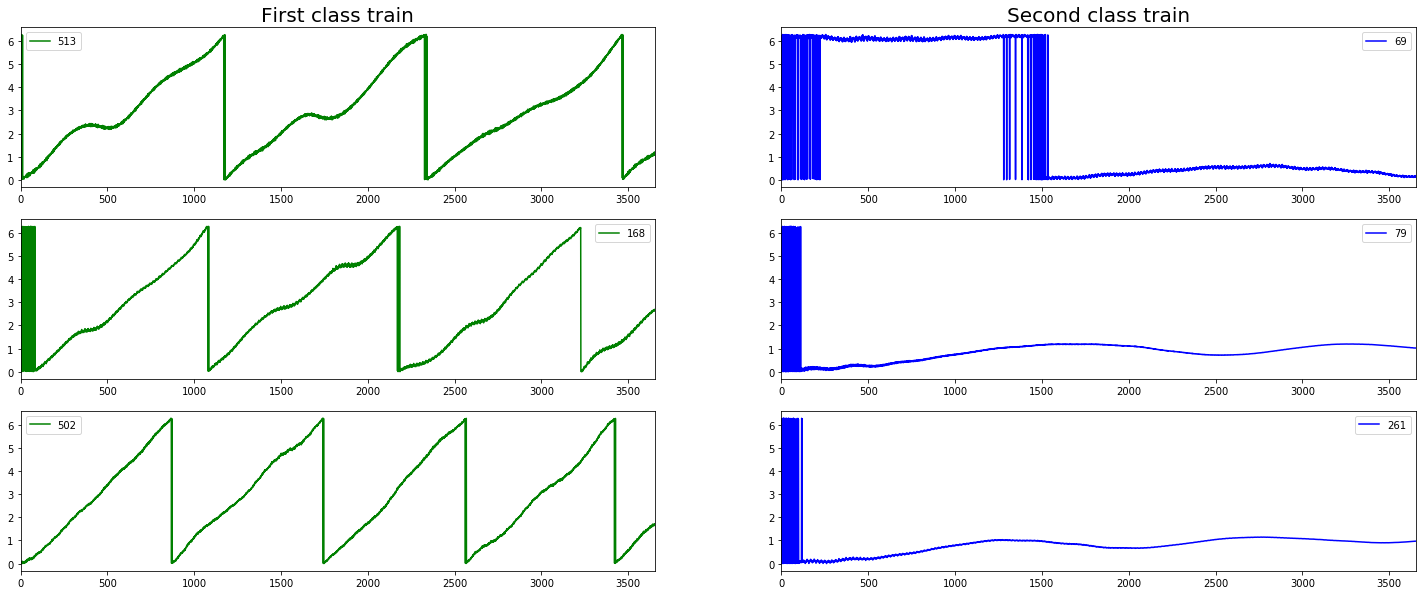

In [5]:
# Строим графики
fig, axes = plt.subplots(nrows=3, ncols=2)

axes[0,0].set_title('First class train', fontsize=20)
df_0_train.plot(ax=axes[0,0], y=randint(0, df_0_train.shape[1]), color='green', figsize=(25,10))
df_0_train.plot(ax=axes[1,0], y=randint(0, df_0_train.shape[1]), color='green', figsize=(25,10))
df_0_train.plot(ax=axes[2,0], y=randint(0, df_0_train.shape[1]), color='green', figsize=(25,10))

axes[0,1].set_title('Second class train', fontsize=20)
df_1_train.plot(ax=axes[0,1], y=randint(0, df_1_train.shape[1]), color='blue', figsize=(25,10))
df_1_train.plot(ax=axes[1,1], y=randint(0, df_1_train.shape[1]), color='blue', figsize=(25,10))
df_1_train.plot(ax=axes[2,1], y=randint(0, df_1_train.shape[1]), color='blue', figsize=(25,10))

### Тестовый набор данных

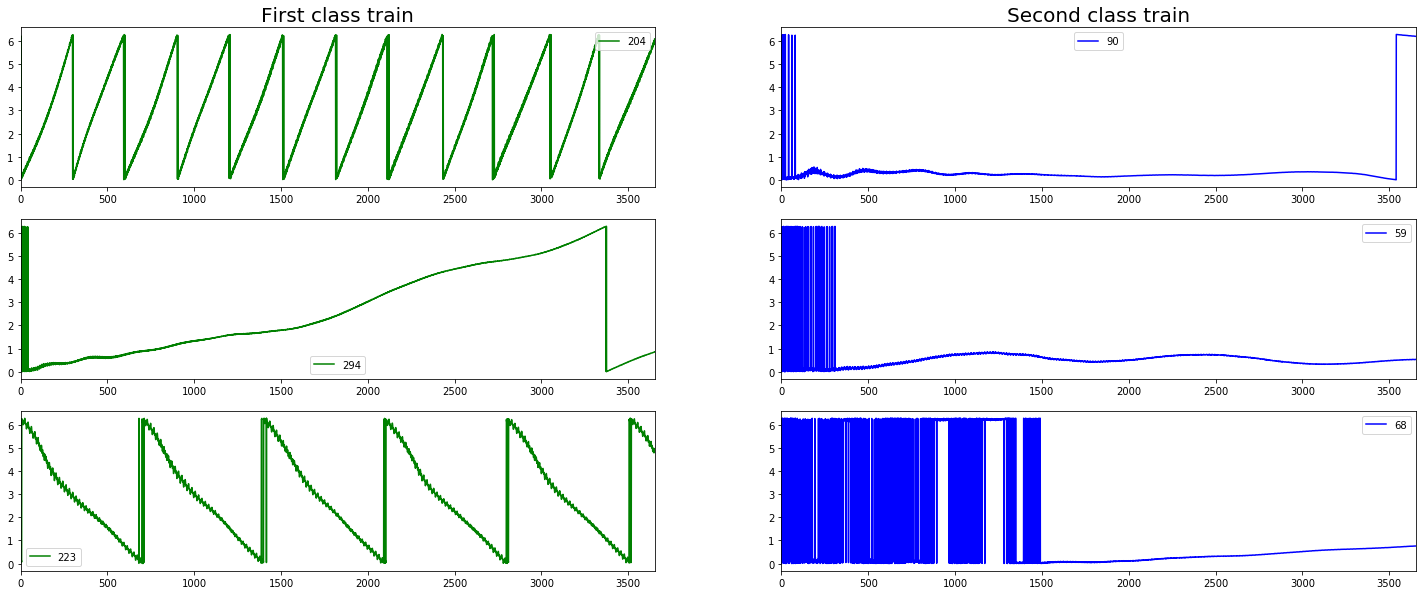

In [6]:
# Строим графики
fig, axes = plt.subplots(nrows=3, ncols=2)

axes[0,0].set_title('First class train', fontsize=20)
# test = pd.Series(np.load('dataset/val/0/1aa955bd-f962-445f-a207-a1451991d2cd.npy')[0:3653])
# test.plot(ax=axes[0,0], y=randint(0,  test.shape[0]), color='green', figsize=(25,10))
df_0_val.plot(ax=axes[0,0], y=randint(0, df_0_val.shape[1]), color='green', figsize=(25,10))
df_0_val.plot(ax=axes[1,0], y=randint(0, df_0_val.shape[1]), color='green', figsize=(25,10))
df_0_val.plot(ax=axes[2,0], y=randint(0, df_0_val.shape[1]), color='green', figsize=(25,10))

axes[0,1].set_title('Second class train', fontsize=20)
df_1_val.plot(ax=axes[0,1], y=randint(0, df_1_val.shape[1]), color='blue', figsize=(25,10))
df_1_val.plot(ax=axes[1,1], y=randint(0, df_1_val.shape[1]), color='blue', figsize=(25,10))
df_1_val.plot(ax=axes[2,1], y=randint(0, df_1_val.shape[1]), color='blue', figsize=(25,10))

#### Как видно из графиков данные классы хорошо различимы.
#### Первый - некий периодический процесс, второй - вначе мне казался похож на некую функцию затухания или отклика системы,  
#### но он возрастает, а это не характерно для таких функций как отклик. 
#### К тому же это может оказаться вообще не физическим процессом, а чем-то иным.